# Classification (Naive Bayes)

Credit: Kalvin

#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Data Preparation

In [2]:
data = pd.read_csv("Breast_Cancer_Classification.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data_out = data.pop("diagnosis")
data["diagnosis"] = data_out

In [4]:
data = data.drop(columns = ["id", "Unnamed: 32"])

In [5]:
data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [6]:
temp_columns = []
for x in data.columns :
  temp_columns.append(x.replace(" ", "_"))
data.columns = temp_columns
print(data.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')


#EDA

In [7]:
data.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst       float64
symmetry_worst      

In [8]:
data.shape

(569, 31)

In [9]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [12]:
# for column in data.columns[:-1] :
#   sns.histplot(data = data, x = column, hue = "diagnosis")
#   plt.show()

Kategori M dan B memiliki perbedaan yang cukup signifikan, hal ini dapat diamati pada :
radius_mean : M antara 10-15, B antara 11-25
texture_mean : M antara 10-20, B antara 15-34
perimeter_mean : M antara 40 - 100, B antara 80 - 180
dan lain-lain, sehingga hal ini dapat mempermudah mesin/model dalam mengklasifikasi data yang diberikan.


In [13]:
# for column in data.columns[:-1] :
#   sns.boxplot(data = data, x = column, hue = "diagnosis")
#   plt.show()

radius_se dan area_se, smoothness_se, concavity_se terlihat memiliki outlier yang cukup parah.

In [14]:
# for i in range(len(data.columns) - 1) :
#   for j in range(i + 1, len(data.columns) - 1) :
#     if(data[data.columns[i]].dtype != "object" and data[data.columns[j]].dtype != "object") :
#       sns.scatterplot(data = data, x = data.columns[i], y = data.columns[j], hue = "diagnosis")
#       plt.show()

radius_mean & perimeter_mean : linear (semakin besar radius_mean, maka semakin besar pula perimeter_mean nya).
radius_mean & area_mean : linear (semakin besar radius_mean, maka semakin besar pula area_mean nya).
Dan dapat kita lihat, bahwasannya distribusi/penyebaran antara kategori M dan B itu cukup merata dan terlihat jelas cluster-nya.

In [15]:
# sns.pairplot(data = data, hue = "diagnosis")
# plt.show()

In [16]:
# for column in data.columns[:-1] :
#   if(data[column].dtype != "object") :
#     print(f"column : {column}, skewness : {data[column].skew()}, kurtosis : {data[column].kurt()}")

#Feature Engineering

In [17]:
missing_percentage = data.isna().sum() / len(data) * 100
missing_percentage

radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave_points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave_points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave_points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
diagnosis                  0.0
dtype: float64

In [18]:
for key, value in missing_percentage.items() :
  if(value > 50.0) :
    data = data.drop(columns = [key], axis = 1)

In [19]:
data.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [20]:
encoder = LabelEncoder()
encoded = {}
for column in data.columns :
  if(data[column].dtype == "object") :
    data[column] = encoder.fit_transform(data[column])
    encoded[column] = {i:class_name for i, class_name in enumerate(encoder.classes_)}
for key, value in encoded.items() :
  print(f"key : {key}, value : {value}")

key : diagnosis, value : {0: 'B', 1: 'M'}


In [21]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
def correlation(data_df, threshold) :
  corr_col = set()
  corr_matrix = data_df.corr()
  print(corr_matrix)
  for i in range(len(corr_matrix.columns)) :
    for j in range(i + 1, len(corr_matrix.columns)) :
      if(np.abs(corr_matrix.iloc[(i, j)]) > threshold) :
        corr_col.add(corr_matrix.columns[j])
  return corr_col

In [23]:
corr_col = correlation(x_train, threshold = 0.9)
print(corr_col)
print(len(corr_col))

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.308002        0.997773   0.986877   
texture_mean                0.308002      1.000000        0.316089   0.305142   
perimeter_mean              0.997773      0.316089        1.000000   0.985482   
area_mean                   0.986877      0.305142        0.985482   1.000000   
smoothness_mean             0.178139     -0.002504        0.214610   0.182181   
compactness_mean            0.509202      0.262278        0.561059   0.494593   
concavity_mean              0.673987      0.308191        0.713989   0.679882   
concave_points_mean         0.828980      0.300754        0.857565   0.825265   
symmetry_mean               0.146344      0.069359        0.183101   0.146438   
fractal_dimension_mean     -0.307899     -0.041511       -0.256517  -0.284380   
radius_se                   0.698262      0.264661        0.710088   0.755875   
texture_se                 -

In [24]:
x_train = x_train.drop(columns = corr_col, axis = 1)
x_test = x_test.drop(columns = corr_col, axis = 1)

In [25]:
# y_train = np.reshape(y_train, (-1, 1))
# y_test = np.reshape(y_test, (-1, 1))

In [26]:
scaler_x_minmax = MinMaxScaler()
scaler_x_standard = StandardScaler()

In [27]:
def scaling(x1, x2, scaler_x) :
  x1 = scaler_x.fit_transform(x1)
  x2 = scaler_x.transform(x2)
  return x1, x2, scaler_x

In [28]:
x_train1, x_test1, scaler_x_minmax = scaling(x_train, x_test, scaler_x_minmax)

In [29]:
x_train2, x_test2, scaler_x_standard = scaling(x_train, x_test, scaler_x_standard)

#Modeling

In [30]:
model = LogisticRegression() #LogisticRegression with MinMaxScaler()
history = model.fit(x_train1, y_train)
y_pred = model.predict(x_test1)
y_pred_prob = model.predict_proba(x_test1)[:, 1]
print(f"accuracy_score : {accuracy_score(y_test, y_pred)}, recall_score : {recall_score(y_test, y_pred)}, precision_score : {precision_score(y_test, y_pred)}, roc_auc_score : {roc_auc_score(y_test, y_pred_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.9298245614035088, recall_score : 0.851063829787234, precision_score : 0.975609756097561, roc_auc_score : 0.9939663385201651
[[66  1]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [31]:
model = LogisticRegression() #LogisticRegression with StandardScaler()
history = model.fit(x_train2, y_train)
y_pred = model.predict(x_test2)
y_pred_prob = model.predict_proba(x_test2)[:, 1]
print(f"accuracy_score : {accuracy_score(y_test, y_pred)}, recall_score : {recall_score(y_test, y_pred)}, precision_score : {precision_score(y_test, y_pred)}, roc_auc_score : {roc_auc_score(y_test, y_pred_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.9824561403508771, recall_score : 0.9787234042553191, precision_score : 0.9787234042553191, roc_auc_score : 0.9965068275643061
[[66  1]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [32]:
model = GaussianNB() #GaussianNB with MinMaxScaler()
history = model.fit(x_train1, y_train)
y_pred = model.predict(x_test1)
y_pred_prob = model.predict_proba(x_test1)[:, 1]
print(f"accuracy_score : {accuracy_score(y_test, y_pred)}, recall_score : {recall_score(y_test, y_pred)}, precision_score : {precision_score(y_test, y_pred)}, roc_auc_score : {roc_auc_score(y_test, y_pred_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.8771929824561403, recall_score : 0.7872340425531915, precision_score : 0.9024390243902439, roc_auc_score : 0.9498253413782153
[[63  4]
 [10 37]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.90      0.79      0.84        47

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



In [33]:
model = GaussianNB() #GaussianNB with StandardScaler()
history = model.fit(x_train2, y_train)
y_pred = model.predict(x_test2)
y_pred_prob = model.predict_proba(x_test2)[:, 1]
print(f"accuracy_score : {accuracy_score(y_test, y_pred)}, recall_score : {recall_score(y_test, y_pred)}, precision_score : {precision_score(y_test, y_pred)}, roc_auc_score : {roc_auc_score(y_test, y_pred_prob)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_score : 0.8771929824561403, recall_score : 0.7872340425531915, precision_score : 0.9024390243902439, roc_auc_score : 0.9498253413782153
[[63  4]
 [10 37]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.90      0.79      0.84        47

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



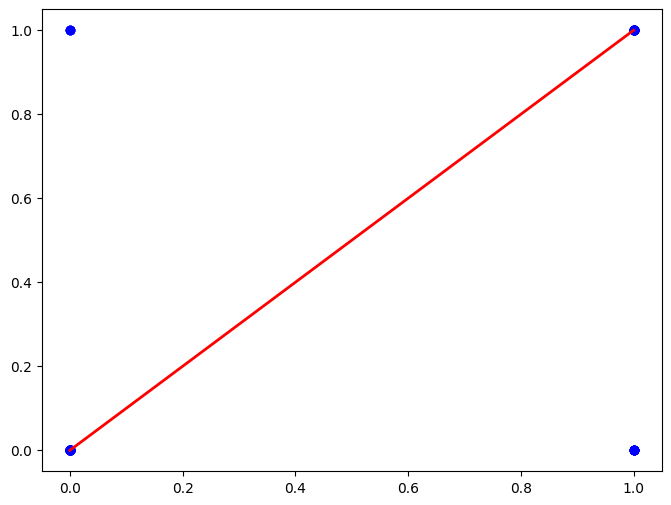

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Data Points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label="Ideal Line (y = x)")